In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
data_url = 'https://drive.google.com/file/d/1IORAR5Zcl44pEzIlFqY71WPHkOPG5Mcx/view?usp=sharing'
data = 'https://drive.google.com/uc?id='+ data_url.split('/')[-2]

raw = pd.read_csv(data)
raw

,Employee Number,Attrition,Job Involvement Level,Job Satisfaction Level,Work Life Balance,Environment Satisfaction,RelationshipSatisfaction,Performance Rating,Age,Distance from home,Job Level,Monthly Income,Years at company,Salary Hike (in percent),Stock Option,Training Time
0,132,0,3,2,4,2,3,3,44,23,2,"$2,042",3,12%,1,3
1,42,1,3,4,4,4,3,3,39,5,2,"$2,086",1,14%,1,6
2,701,1,3,3,3,4,4,3,20,10,1,"$1,009",1,11%,0,5
3,1012,0,3,4,3,2,4,3,18,5,1,"$1,051",0,15%,0,2
4,1056,0,3,2,3,4,2,4,28,10,1,"$1,052",1,22%,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2057,0,3,1,3,2,2,3,31,5,2,"$9,936",9,19%,0,2
1466,1468,0,2,2,3,4,3,3,40,8,3,"$13,757",9,11%,1,5
1467,1084,0,3,1,2,3,3,3,30,20,2,"$9,957",6,15%,1,1
1468,293,0,3,3,3,4,4,3,27,20,2,"$9,981",7,14%,0,2


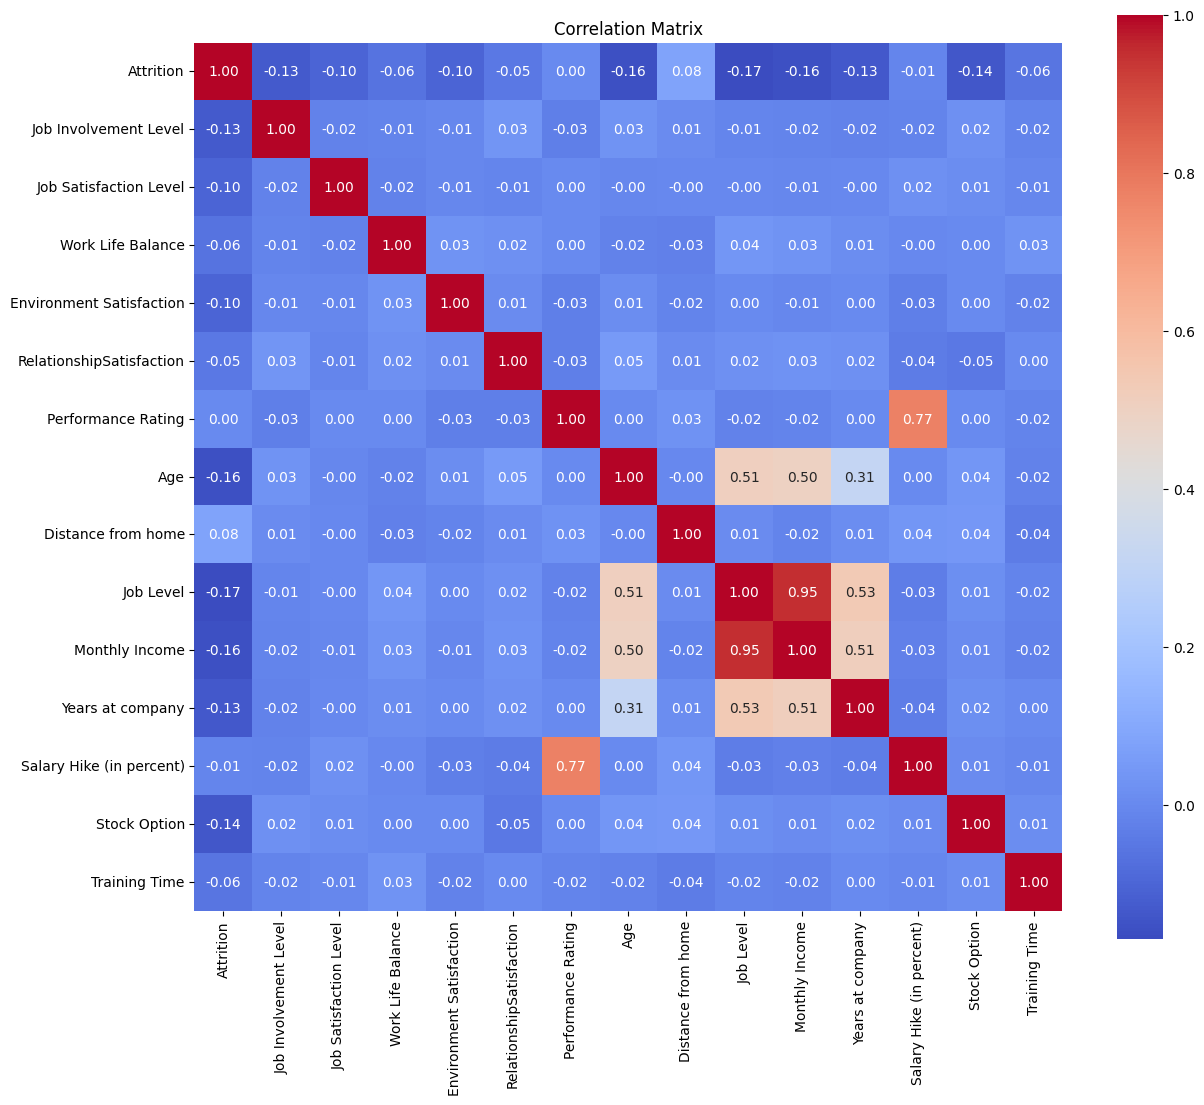

In [ ]:
# Convert "Monthly Income" and "Salary Hike (in percent)" to numeric
raw['Monthly Income'] = raw['Monthly Income'].replace('[\$,]', '', regex=True).astype(float)
raw['Salary Hike (in percent)'] = raw['Salary Hike (in percent)'].replace('[\%,]', '', regex=True).astype(float)

# Calculate the correlation
correlation = raw.drop('Employee Number', axis=1).corr()

# Create a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

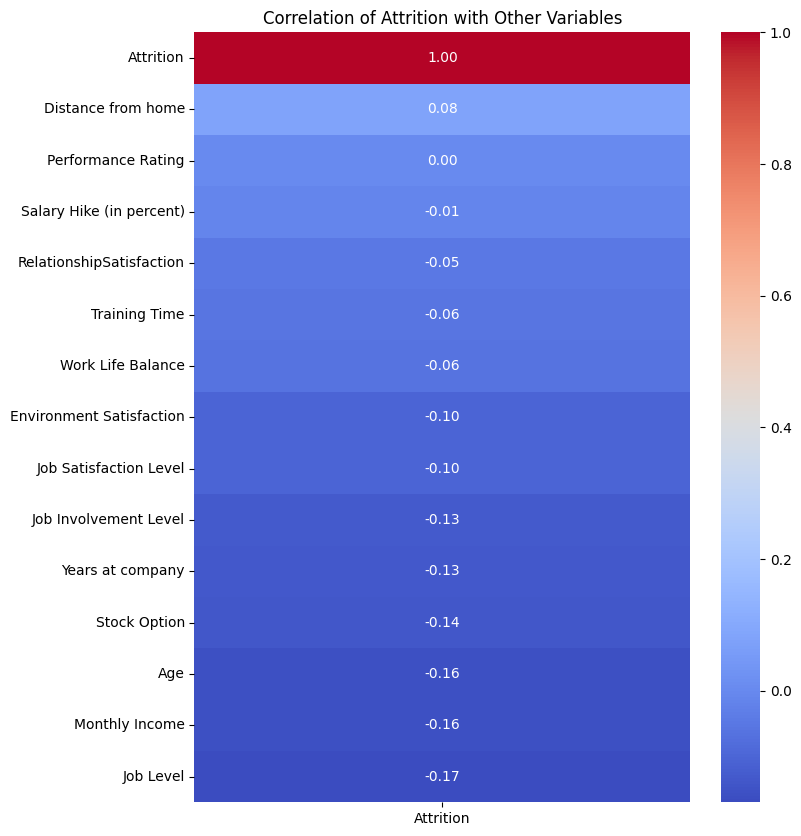

In [ ]:
# Convert "Monthly Income" and "Salary Hike (in percent)" to numeric
raw['Monthly Income'] = raw['Monthly Income'].replace('[\$,]', '', regex=True).astype(float)
raw['Salary Hike (in percent)'] = raw['Salary Hike (in percent)'].replace('[\%,]', '', regex=True).astype(float)

# Calculate the correlation
correlation = raw.drop('Employee Number', axis=1).corr()

# Select 'Attrition' column and sort the values
attrition_corr = correlation['Attrition'].sort_values(ascending=False)

# Convert the series to a dataframe for the heatmap
attrition_corr = pd.DataFrame(attrition_corr)

# Create a heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(attrition_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation of Attrition with Other Variables')
plt.show()

In [ ]:
# Convert "Monthly Income" and "Salary Hike (in percent)" to numeric
raw['Monthly Income'] = raw['Monthly Income'].replace('[\$,]', '', regex=True).astype(float)
raw['Salary Hike (in percent)'] = raw['Salary Hike (in percent)'].replace('[\%,]', '', regex=True).astype(float)

# Calculate the p-value
p_values = {column: pearsonr(raw['Attrition'], raw[column])[1] for column in raw.columns if column != 'Attrition' and column != 'Employee Number'}

# Convert the dictionary to a DataFrame
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# Add a column for significance
p_values_df['Significant'] = p_values_df['p-value'] < 0.05

# Display the DataFrame
p_values_df.sort_values('p-value')

,p-value,Significant
Job Level,6.795385e-11,True
Monthly Income,7.147364e-10,True
Age,8.356308e-10,True
Stock Option,1.301015e-07,True
Years at company,2.318872e-07,True
Job Involvement Level,5.677065e-07,True
Job Satisfaction Level,7.043067e-05,True
Environment Satisfaction,7.172339e-05,True
Distance from home,2.793060e-03,True
Work Life Balance,1.421105e-02,True


In [ ]:
print(raw.columns)

Index(['Employee Number', 'Attrition', 'Job Involvement Level',
       'Job Satisfaction Level', 'Work Life Balance',
       'Environment Satisfaction', 'RelationshipSatisfaction',
       'Performance Rating', 'Age', 'Distance from home', 'Job Level',
       'Monthly Income', 'Years at company', 'Salary Hike (in percent)',
       'Stock Option', 'Training Time'],
      dtype='object')
